What is the probability that a randomly selected movie has a popularity score of 5?

Fetching data from 50 random pages (~1000 movies)...

Fetching page 55 — Status: 200
✅ Page 55 returned 20 movies.
Fetching page 34 — Status: 200
✅ Page 34 returned 20 movies.
Fetching page 82 — Status: 200
✅ Page 82 returned 20 movies.
Fetching page 324 — Status: 200
✅ Page 324 returned 20 movies.
Fetching page 307 — Status: 200
✅ Page 307 returned 20 movies.
Fetching page 113 — Status: 200
✅ Page 113 returned 20 movies.
Fetching page 484 — Status: 200
✅ Page 484 returned 20 movies.
Fetching page 106 — Status: 200
✅ Page 106 returned 20 movies.
Fetching page 37 — Status: 200
✅ Page 37 returned 20 movies.
Fetching page 254 — Status: 200
✅ Page 254 returned 20 movies.
Fetching page 390 — Status: 200
✅ Page 390 returned 20 movies.
Fetching page 102 — Status: 200
✅ Page 102 returned 20 movies.
Fetching page 431 — Status: 200
✅ Page 431 returned 20 movies.
Fetching page 12 — Status: 200
✅ Page 12 returned 20 movies.
Fetching page 162 — Status: 200
✅ Page 162 returned 20 movies.
Fetching pa

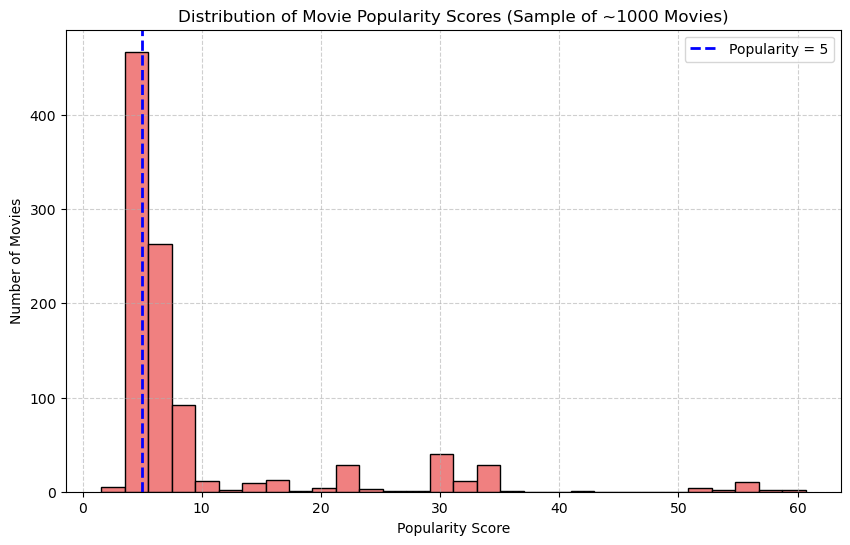

In [9]:
import requests
import pandas as pd
import random
import time
import matplotlib.pyplot as plt

# --- Configuration ---
api_key = "e6239f06b8b0ac5b6a7dcf6a92720dc4"  # Your TMDb API key
base_url = "https://api.themoviedb.org/3/discover/movie"
num_pages_to_sample = 50   # 50 pages × ~20 movies per page ≈ 1000 movies

# --- Collect movie data ---
random_pages = random.sample(range(1, 501), num_pages_to_sample)
movies = []

print(f"Fetching data from {num_pages_to_sample} random pages (~1000 movies)...\n")

for page in random_pages:
    params = {
        "api_key": api_key,
        "sort_by": "popularity.desc",
        "page": page
    }

    response = requests.get(base_url, params=params)
    print(f"Fetching page {page} — Status: {response.status_code}")

    if response.status_code != 200:
        print(f"❌ Error fetching page {page}: {response.text}")
        continue

    data = response.json()
    results = data.get("results", [])
    print(f"✅ Page {page} returned {len(results)} movies.")

    for movie in results:
        movies.append({
            "id": movie["id"],
            "title": movie.get("title"),
            "popularity_score": movie.get("popularity"),
            "vote_average": movie.get("vote_average"),
            "release_date": movie.get("release_date"),
            "genre_ids": movie.get("genre_ids")
        })

    # To avoid hitting TMDb’s rate limits
    time.sleep(0.25)

# --- Results summary ---
print(f"\nTotal movies collected: {len(movies)}")

if not movies:
    print("No movies collected. Check your API key or connection.")
else:
    # Convert to DataFrame
    df = pd.DataFrame(movies)
    
    # Display summary statistics
    print("\nSummary statistics of popularity scores:")
    print(df["popularity_score"].describe())

    # --- Calculate probability that popularity ≈ 5 ---
    df["popularity_rounded"] = df["popularity_score"].round(0)
    
    total_movies = len(df)
    movies_with_popularity_5 = len(df[df["popularity_rounded"] == 5])
    
    probability_pop_5 = movies_with_popularity_5 / total_movies if total_movies > 0 else 0

    print(f"\nNumber of movies with popularity ≈ 5: {movies_with_popularity_5}")
    print(f"Total movies: {total_movies}")
    print(f"Probability a random movie has popularity ≈ 5: {probability_pop_5:.4f}")

    # --- Create histogram ---
    plt.figure(figsize=(10, 6))
    plt.hist(df["popularity_score"].dropna(), bins=30, color="lightcoral", edgecolor="black")
    plt.title("Distribution of Movie Popularity Scores (Sample of ~1000 Movies)")
    plt.xlabel("Popularity Score")
    plt.ylabel("Number of Movies")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.axvline(5, color="blue", linestyle="--", linewidth=2, label="Popularity = 5")
    plt.legend()
    plt.show()
